In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
%autosave 0

Autosave disabled


In [4]:
class MulLayer:
    def __init__(self):
        self.x=None
        self.y=None
    def forward(self,x,y):
        self.x=x
        self.y=y
        out=x*y
        return out
    def backward(self,dout):
        dx=dout*self.y
        dy=dout*self.x
        return dx,dy

In [5]:
class AddLayer:
    def __init__(self):
        pass
    def forward(self,x,y):
        out=x+y
        return out
    def backward(self,dout):
        dx=dout*1
        dy=dout*1
        return dx,dy

In [51]:
class Affine:
    def __init__(self):
        self.w=np.random.randn(1)
        self.b=np.random.randn(1)
        self.N=None
    def forward(self,x,t):
        x=x.reshape(-1,1)
        self.N=x.shape[0]
        y_pred=np.dot(x,self.w)+self.b
        loss=1./self.N*(np.sum((y_pred-t)**2))
        self.cache=(x,y_pred,t)
        return loss
    def backward(self,dout):
        x,y_pred,t=self.cache
        d1=dout/self.N
        d2=np.sum(d1,axis=0)
        d3=d1*2*(y_pred-t)
        d4=d3
        db=np.sum(d4,axis=0)
        d5=d4
        #dx=np.dot(d5,self.w.T)
        dw=np.dot(x.T,d5)
        return dw,db    

In [7]:
x=np.random.normal(0,1,50)

In [29]:
params=np.array([3.,4.])

In [36]:
y=(np.dot(x.reshape(-1,1),params[0])+params[1]).reshape(50)
y+=np.random.normal(0,1,50)
y.shape

(50,)

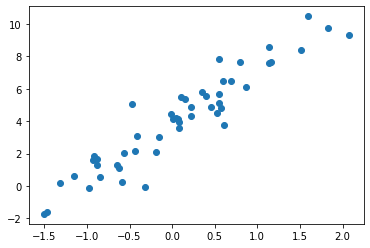

In [37]:
plt.scatter(x,y)
plt.show()

In [52]:
affine=Affine()

In [53]:
affine.forward(x,y)

28.851583133556243

In [55]:
dw,db=affine.backward(1)

In [63]:
print(dw,db)

[-6.29174354] -8.102054472912766


In [96]:
for i in range(100):
    loss=affine.forward(x,t)
    dw,db=affine.backward(1)
    affine.w-=0.01*dw
    affine.b-=0.01*db
    print('loss :',loss)

loss : 0.995023860244451
loss : 0.9948459445077192
loss : 0.9946732915069558
loss : 0.9945057418720005
loss : 0.9943431411981347
loss : 0.9941853398862552
loss : 0.9940321929883719
loss : 0.993883560058249
loss : 0.993739305007015
loss : 0.9935992959635662
loss : 0.9934634051396019
loss : 0.993331508699129
loss : 0.9932034866322876
loss : 0.9930792226333433
loss : 0.9929586039827087
loss : 0.9928415214328545
loss : 0.9927278690979751
loss : 0.9926175443472849
loss : 0.9925104477018182
loss : 0.9924064827346171
loss : 0.992305555974184
loss : 0.9922075768111013
loss : 0.9921124574076986
loss : 0.9920201126106694
loss : 0.9919304598665393
loss : 0.9918434191398839
loss : 0.9917589128342117
loss : 0.9916768657154112
loss : 0.9915972048376885
loss : 0.9915198594719006
loss : 0.9914447610362112
loss : 0.9913718430289877
loss : 0.9913010409638665
loss : 0.9912322923069091
loss : 0.9911655364157899
loss : 0.9911007144809325
loss : 0.9910377694685454
loss : 0.9909766460654811
loss : 0.99091729

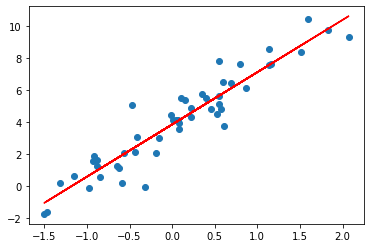

In [97]:
(x,y_pred,t)=affine.cache
plt.scatter(x,t)
plt.plot(x,y_pred,'r')
plt.show()